In [1]:
#!pip install PySide2
#!pip install PyQt5

# Use non-linear least squares to fit a function, f, to data.

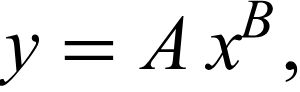

B =

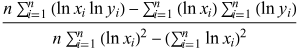

A = exp(

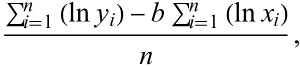

In [2]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [3]:
df = pd.read_csv("GUI/demoFile_LCMS_to_csv.csv")

In [4]:
x = df["m/z"]
y = df["resolution"]
h_u_e = df["intensity"]
size = df["S/N"]

In [5]:
x_log = []
x_log_sq = []
y_log = []
for i in range(len(y)):
    x_log.append(math.log(x[i]))
    x_log_sq.append( (math.log(x[i]))**2 )
    y_log.append(math.log(y[i]))

In [6]:
lnXlnY = []
for i in range(len(y)):
    lnXlnY.append( x_log[i] * y_log[i] )
sum_lnXlnY = np.sum(lnXlnY)
sum_lnX = np.sum(x_log)
sum_lnY = np.sum(y_log)
sum_lnX2 = np.sum(x_log_sq)

In [7]:
B = (len(y) * sum_lnXlnY - sum_lnX * sum_lnY) / (len(y) * sum_lnX2 - sum_lnX ** 2)

In [8]:
B, round(B, 4)

(-0.5013734680723501, -0.5014)

In [9]:
A = math.exp( (sum_lnY - B * sum_lnX) / len(y) )

In [10]:
A, round(A)

(1152230.61119879, 1152231)

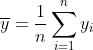

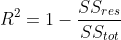

In [11]:
# ln(y) = ln(A) + B*ln(x)
lnY_estimate = []
for i in range(len(y)):
    lnY_estimate.append( math.log(A) + B * x_log[i] )

mean = np.mean(y_log)
residuals = []
tot = []
for i in range(len(y)):
    residuals.append( (y_log[i] - lnY_estimate[i])**2 )
    tot.append( (y_log[i] - mean)**2 )
    
ss_res = np.sum(residuals)
ss_tot = np.sum(tot)
r_squared = 1 - (ss_res / ss_tot)
r_squared, round(r_squared, 4)

(0.9995908134980573, 0.9996)

result from scipy is not precise: A != 1155433.737681323, B != -0.5019789442331981so I calculate the coefficient A value & index B value by myself, giving out the same values as the values calculated by Excel, accompanying with the R-square value.


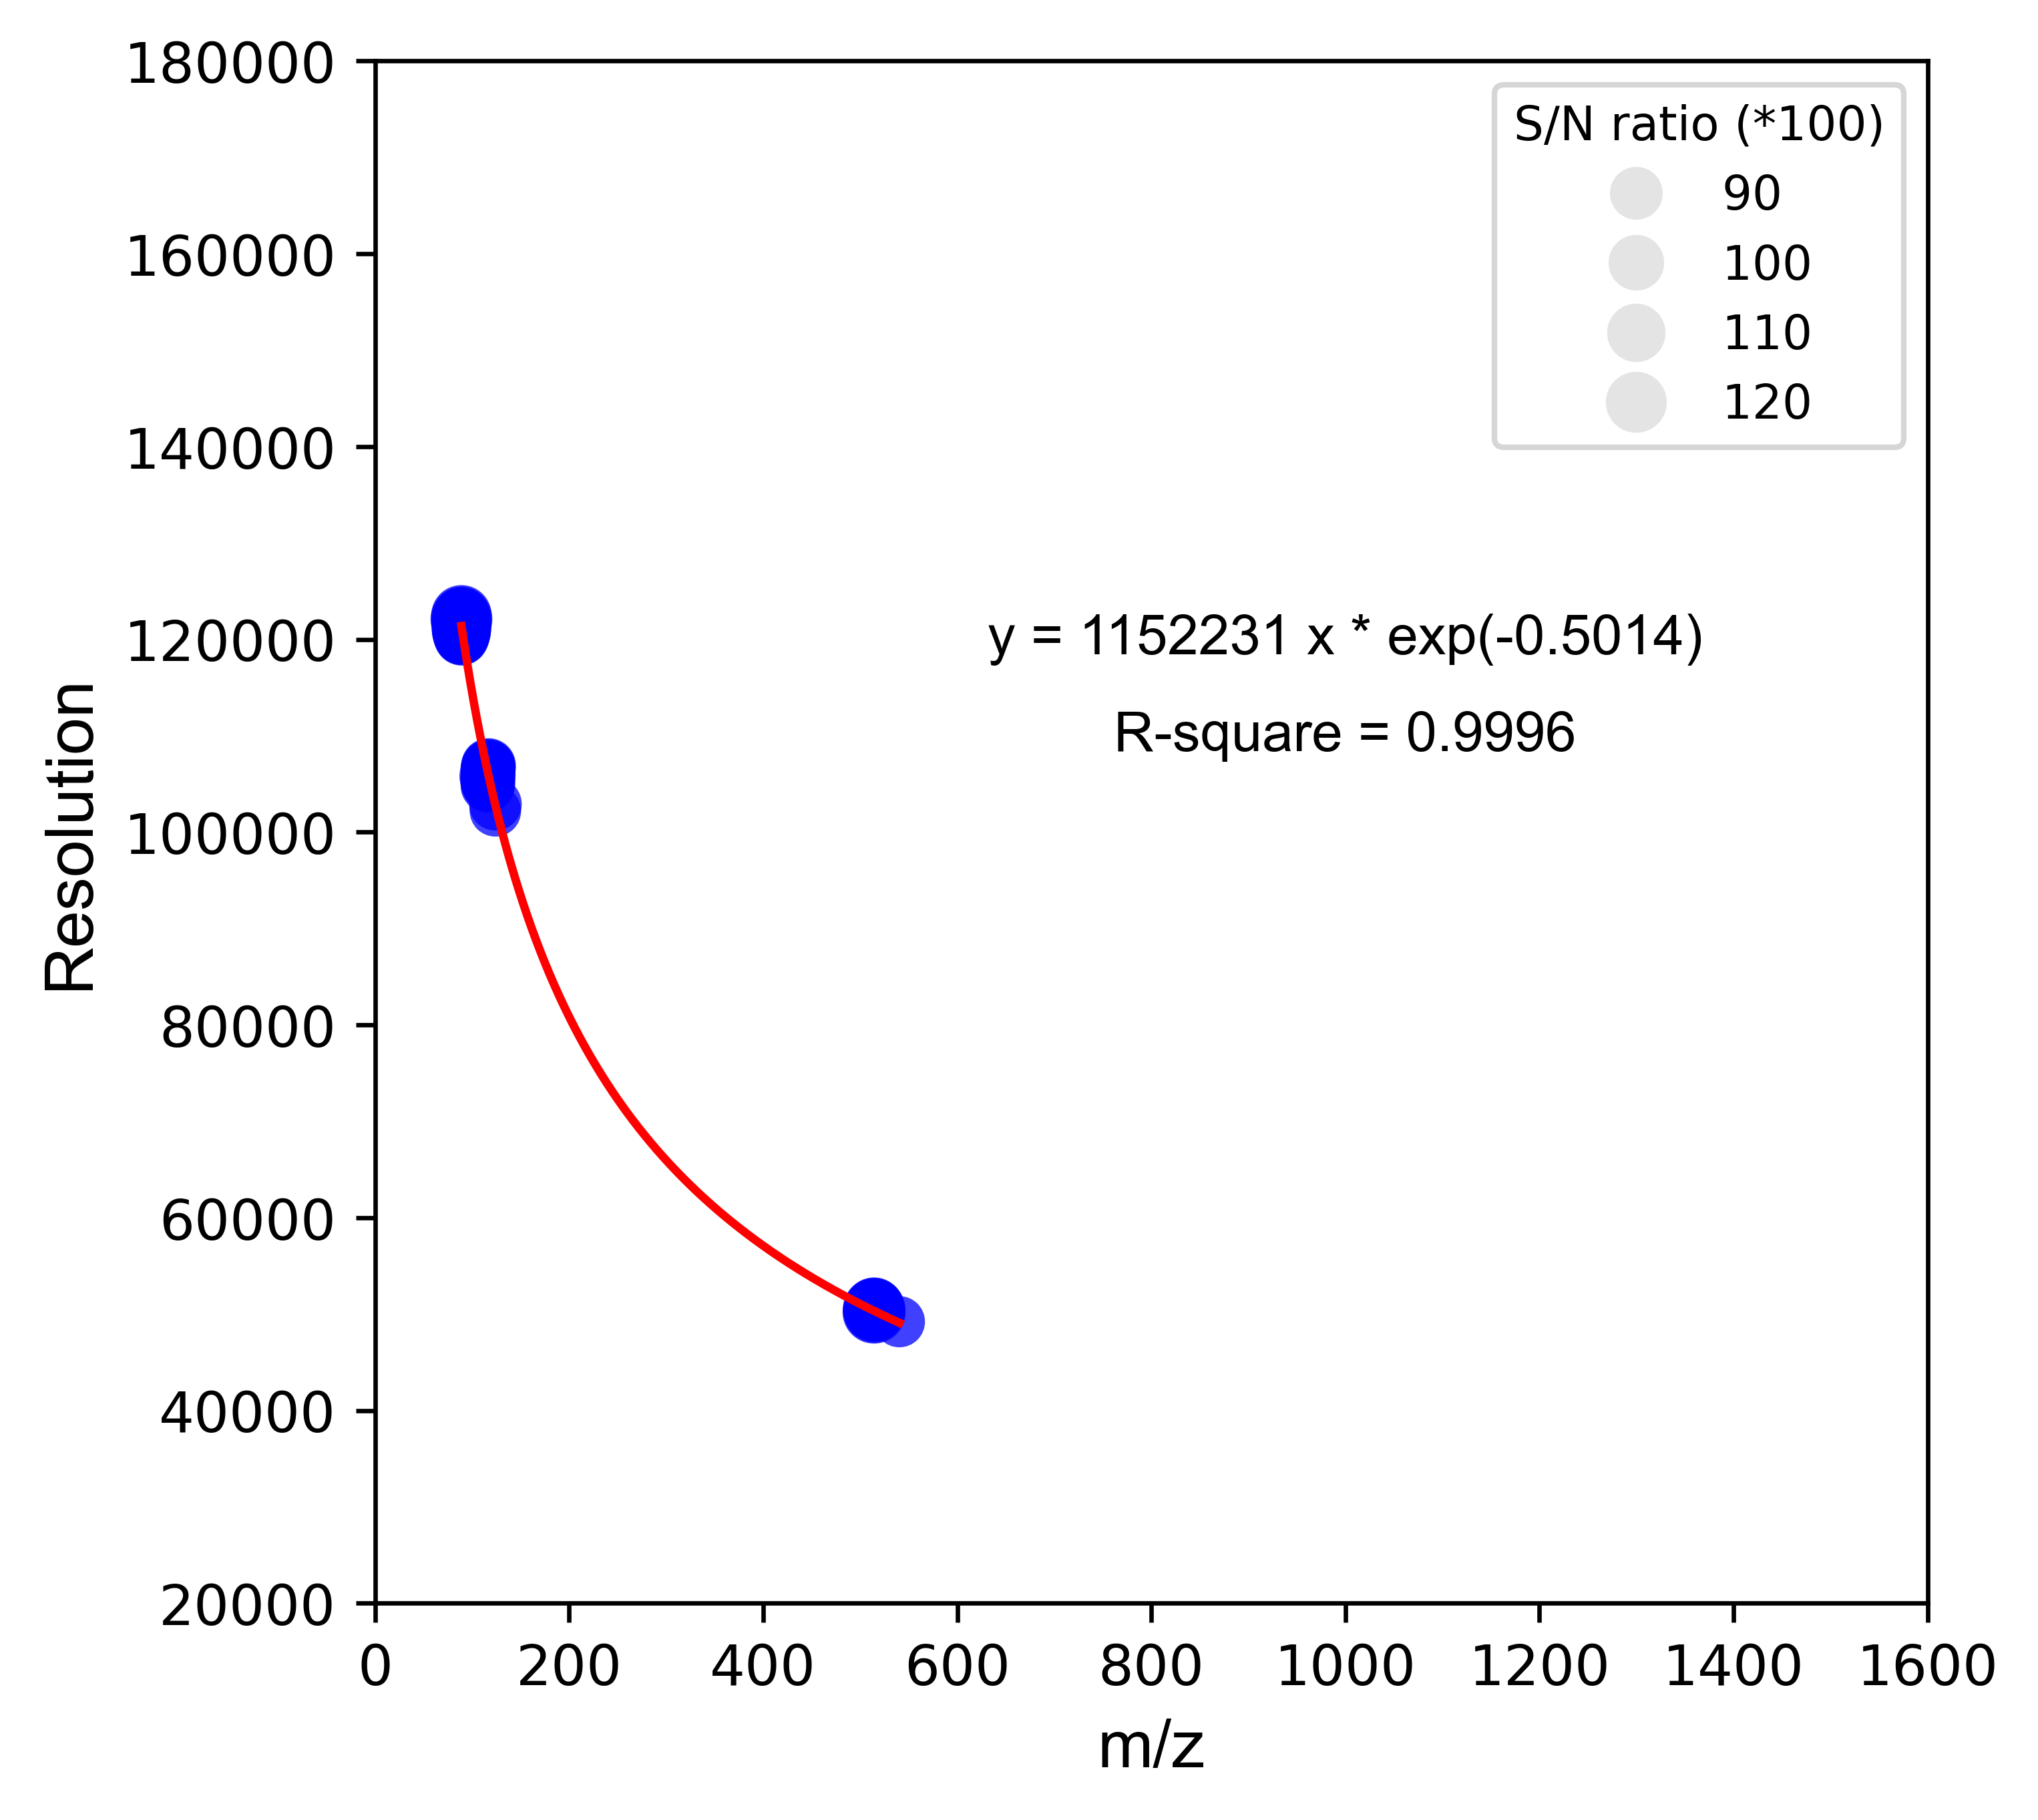

In [12]:
plt.close()
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams["figure.dpi"] = 600

popt, pcov = curve_fit(lambda fx,k,t: k*fx**-t, x, y)
x_linspace = np.linspace(min(x), max(x), 500)
power_y = popt[0]*x_linspace**-popt[1]

(fig, ax) = plt.subplots()

scatter = ax.scatter(x, y, s=df["S/N"]/100, label='detected ions (size: S/N ratio)', c="blue", alpha=0.75, lw=0)
plt.xlabel("m/z", fontproperties='Arial', fontsize=12)
plt.ylabel("Resolution", fontproperties='Arial', fontsize=12)
plt.xlim(0,1600)
plt.ylim(20000,180000)
plt.plot(x_linspace, power_y, label='regression curve', color = "red")
print("result from scipy is not precise: A != " + str(popt[0]) + ", B != -" + str(popt[1]) 
      + "so I calculate the coefficient A value & index B value by myself," 
      + " giving out the same values as the values calculated by Excel, accompanying with the R-square value.")

#print(popt)
#plt.text(1000, 120000,'y = ' + str(round(popt[0])) + ' x * exp(-' + str(round(popt[1],4)) + ')', horizontalalignment='center', verticalalignment='center')

ax.annotate('y = ' + str(round(A)) + ' x * exp(' + str(round(B, 4)) + ')', (1000, 120000), horizontalalignment='center',
     verticalalignment='center', fontproperties='Arial', fontsize=10)
ax.annotate('R-square = ' + str(round(r_squared, 4)), (1000, 110000), horizontalalignment='center',
     verticalalignment='center', fontproperties='Arial', fontsize=10)

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, color="lightgrey", num=4)
legend = ax.legend(handles, labels, loc="upper right", title="S/N ratio (*100)", title_fontsize=8.5, fontsize=8.5)
#plt.show()
#plt.savefig("regression_MSI.tif", bbox_inches='tight')
plt.savefig("regression_LCMS.jpg", bbox_inches='tight')
#plt.close()

The image below is from the sharing file- demoFile_DI_to_csv.pdf

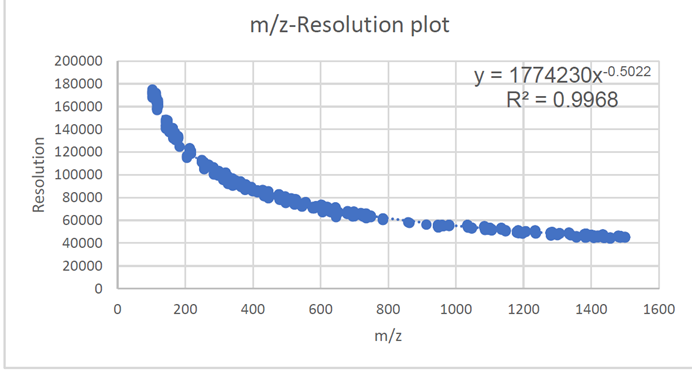

The image below is from the sharing file- demoFile_LCMS_to_csv.pdf

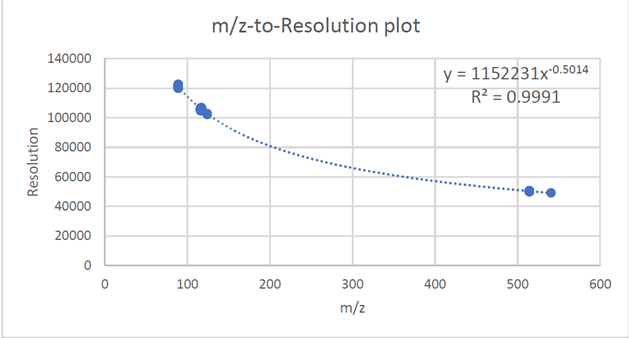

The image below is from the sharing file- demoFile_MSI_to_csv.pdf

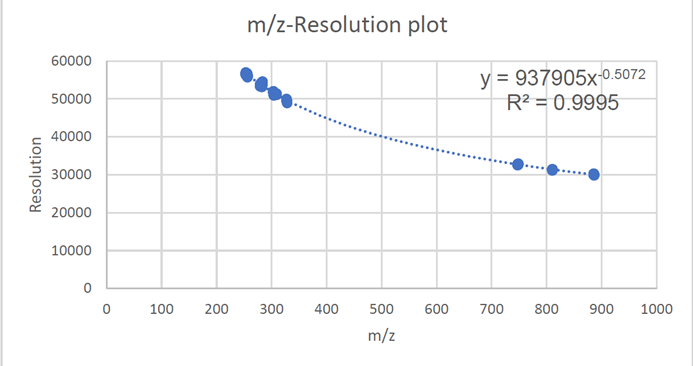